In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

In [79]:

file = uproot.open("dati/postFrascati/27p5/Hits.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

Bremm LOr intensity

In [80]:
data1 = data[(data['z'] > 0)]   
data2 = data[(data['z'] < 0)]

print(np.shape(data1))
print(np.shape(data2))

(4193, 12)
(4046, 12)


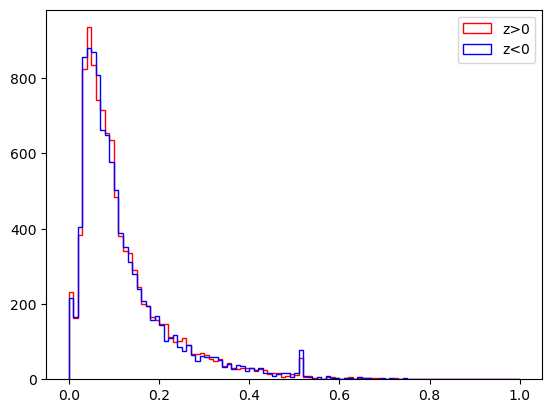

In [69]:
plt.hist(data1['EDepDet'], bins=100, histtype='step', color='r', label='z>0',range=(0,1))
plt.hist(data2['EDepDet'], bins=100, histtype='step', color='b', label='z<0',range=(0,1))
plt.legend()
plt.show()


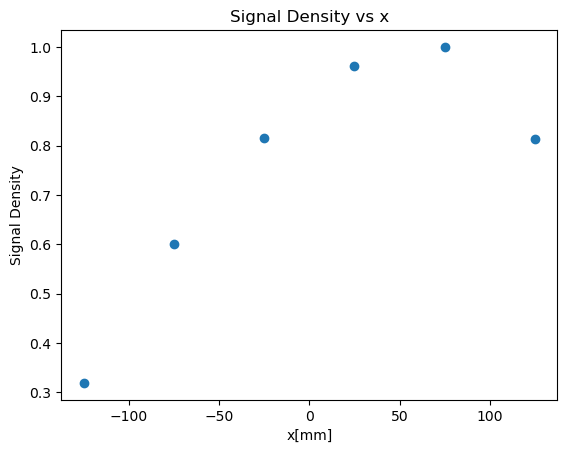

In [82]:
x=[-125,-75,-25,25,75,125]
sig=[4193,7894,10708,12633,13142,10699]
sig=np.array(sig)/np.max(sig)

plt.scatter(x,sig)
plt.xlabel('x[mm]')
plt.ylabel('Signal Density')
plt.title('Signal Density vs x')
plt.show()


Demonstration

(290571,)


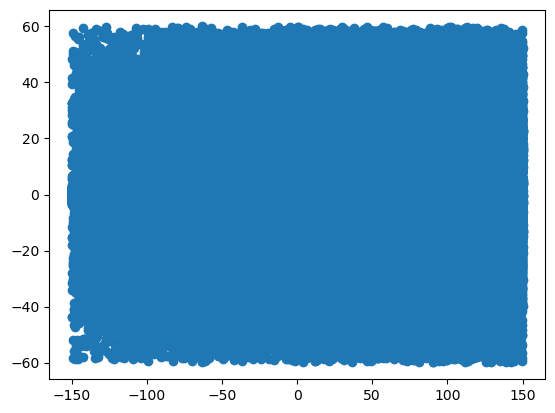

In [116]:
csv_file_path3 = 'build/gamma_entering_particles.csv'


df_gamma = pd.read_csv(csv_file_path3, delimiter=',', header=None, names=['Energy', 'X', 'Y', 'Z','pX', 'pY', 'pZ','evt'])

print(np.shape(df_gamma['X']))


plt.scatter(df_gamma['X'], df_gamma['Y'])
#plt.xlim(-150, 150)
#plt.ylim(-100, 100)
plt.show()

In [117]:

mask = ~np.isclose(df_gamma['Energy'], 510.99, atol=0.1 * 510.99)
df_gamma_filtered = df_gamma[mask]



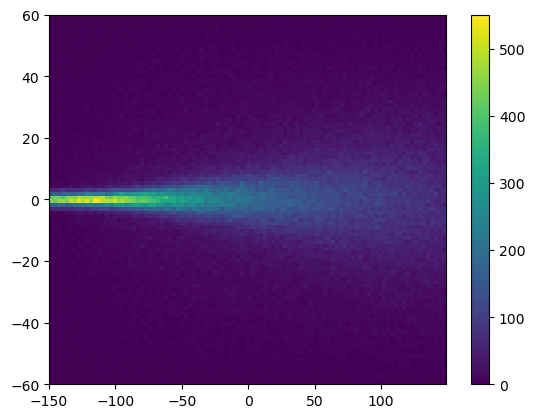

In [118]:
plt.hist2d(df_gamma_filtered['X'], df_gamma_filtered['Y'], bins=(100,100), cmap='viridis',range=[[-150, 149], [-60, 60]])
plt.colorbar()
plt.show()

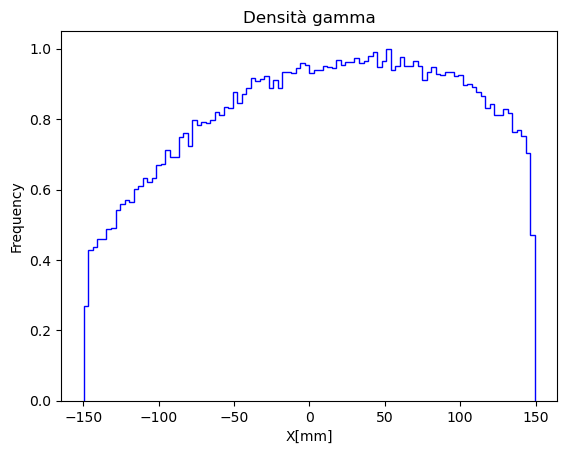

In [119]:
hist2d, x_edges, y_edges = np.histogram2d(df_gamma_filtered['X'], df_gamma_filtered['Y'], bins=(100, 1), range=[[-151, 151], [-100, 100]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

hist_slice = hist_slice / np.max(hist_slice)

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=100,histtype='step')

# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Densità gamma')

#plt.scatter(x,sig,color='red')

# Show the plot
plt.show()

Angolare

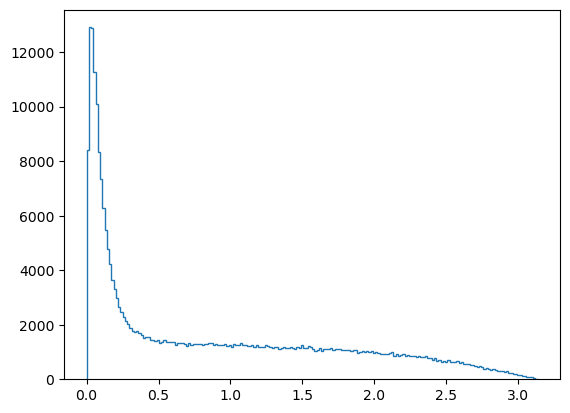

In [120]:
theta=np.arccos(df_gamma['pX']/np.sqrt(df_gamma['pX']**2+df_gamma['pY']**2+df_gamma['pZ']**2))

plt.hist(theta, bins=200, histtype='step')
plt.show()

(108085,)


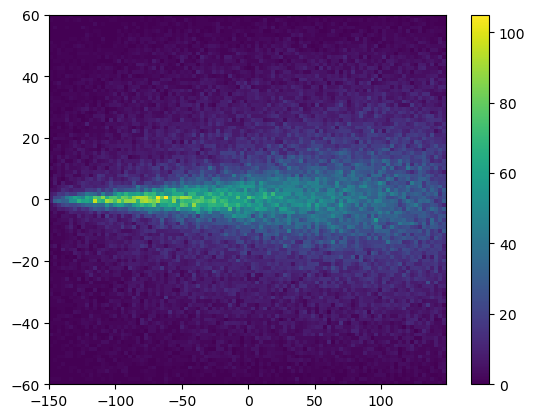

In [124]:
df_gamma['theta']=theta

df_gamma=df_gamma[np.isclose(df_gamma['theta'],1.5,atol=0.5*1.5)]
df_gamma.to_csv('gamma_entering_preproc.csv', index=False)


print(np.shape(df_gamma['X']))


plt.hist2d(df_gamma['X'], df_gamma['Y'], bins=(100,100), cmap='viridis',range=[[-150, 149], [-60, 60]])
plt.colorbar()
plt.show()

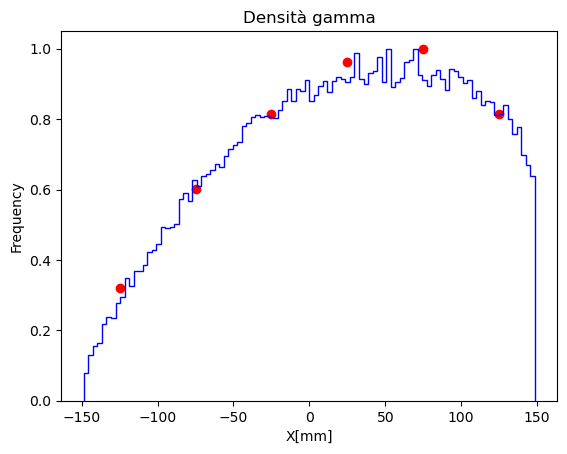

In [122]:
hist2d, x_edges, y_edges = np.histogram2d(df_gamma['X'], df_gamma['Y'], bins=(100, 1), range=[[-149.99, 149.99], [-100, 100]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

hist_slice = hist_slice / np.max(hist_slice)

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=100,histtype='step')

# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Densità gamma')

plt.scatter(x,sig,color='red')

# Show the plot
plt.show()

In [103]:

file = uproot.open("build/Hits.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

In [104]:


edep= data['EDep']

xloc= data['xloc'] 

print(np.shape(xloc))


(633827,)


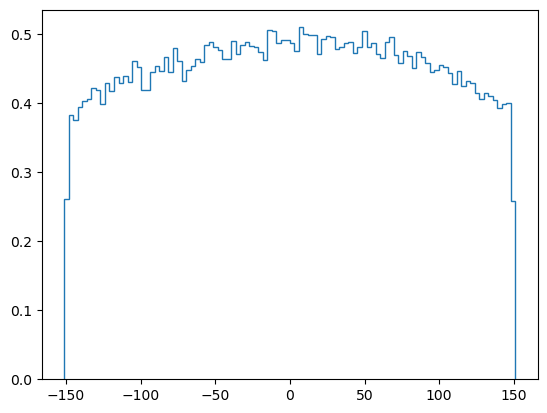

In [105]:
edep=np.array(edep)/17500
plt.hist(xloc,weights=edep,bins=100,histtype='step',range=(-151,151))
plt.show()


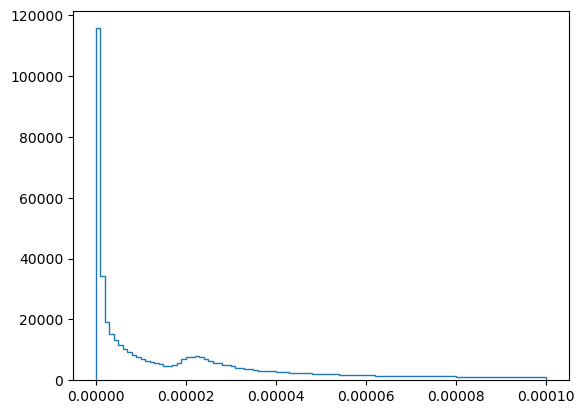

In [115]:
plt.hist(edep,bins=100,histtype='step',range=(0.00000,0.0001))
plt.show()

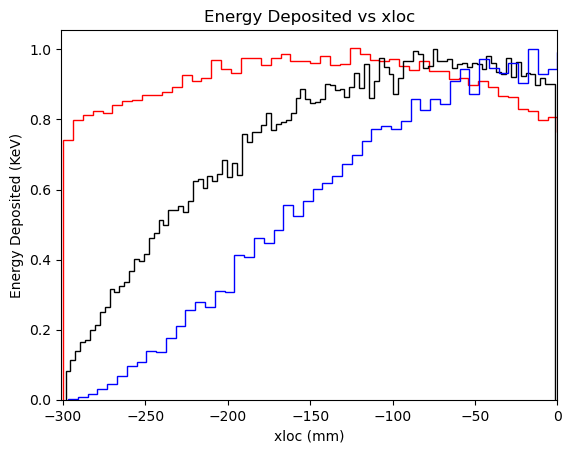

In [66]:
plt.hist(xloc,weights=edep,bins=100,histtype='step',color='red')

plt.hist(bin_centers_x-150, weights=hist_slice, color='black', bins=100,histtype='step')
plt.hist(bin_centers_x_ann, weights=hist_slice_ann, color='blue', bins=100,histtype='step')
plt.xlabel("xloc (mm)")
plt.ylabel("Energy Deposited (KeV)")
plt.xlim(-301,0)
plt.title("Energy Deposited vs xloc")
plt.show()

80mev

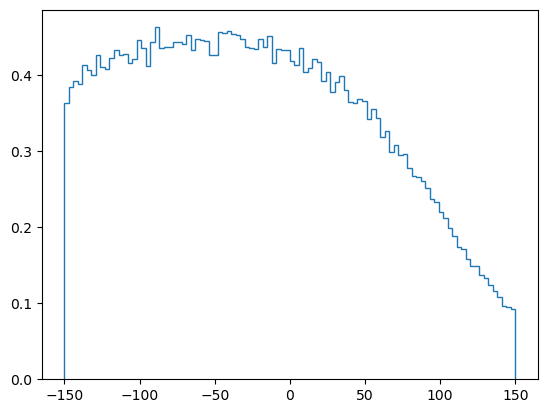

In [4]:

file = uproot.open("dati/cilindrofan/80mev/Hits.root")
tree = file["Hits"]

data = tree.arrays(library="pd")

edep= data['EDep']

xloc= data['xloc'] 


edep=np.array(edep)/17500
plt.hist(xloc,weights=edep,bins=100,histtype='step',range=(-150,150))
plt.show()


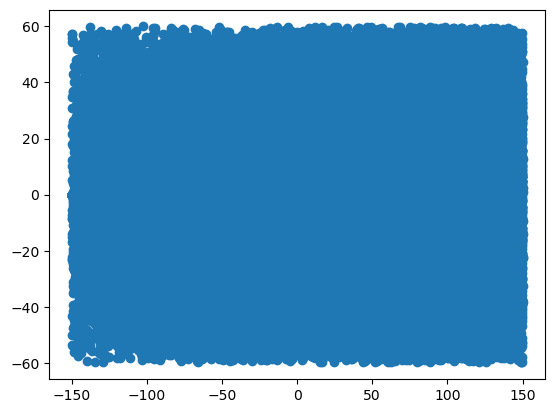

In [5]:
csv_file_path3 = 'dati/cilindrofan/80mev/gamma_entering_particles.csv'


df_gamma = pd.read_csv(csv_file_path3, delimiter=',', header=None, names=['Energy', 'X', 'Y', 'Z','pX', 'pY', 'pZ','evt'])


plt.scatter(df_gamma['X'], df_gamma['Y'], label='C11',)
#plt.xlim(-150, 150)
#plt.ylim(-100, 100)
plt.show()

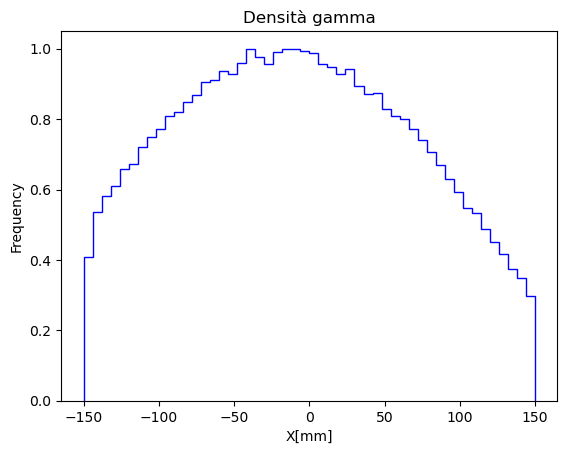

In [8]:
hist2d, x_edges, y_edges = np.histogram2d(df_gamma['X'], df_gamma['Y'], bins=(100, 1), range=[[-300.99, 299], [-100, 100]])

slice_index = 0

# Extract the slice from the 2D histogram
hist_slice = hist2d[:, slice_index]

hist_slice = hist_slice / np.max(hist_slice)

bin_centers_x = (x_edges[:-1] + x_edges[1:]) / 2

plt.hist(bin_centers_x, weights=hist_slice, color='blue', bins=50,histtype='step',range=(-150,150))

# Add labels and title
plt.xlabel('X[mm]')
plt.ylabel('Frequency')
plt.title('Densità gamma')

#plt.scatter(x,sig,color='red')

# Show the plot
plt.show()

In [9]:
theta=np.arccos(df_gamma['pX']/np.sqrt(df_gamma['pX']**2+df_gamma['pY']**2+df_gamma['pZ']**2))


In [10]:
df_gamma['theta']=theta

df_gamma=df_gamma[np.isclose(df_gamma['theta'],1.5,atol=0.5*1.5)]
